In [1]:
import numpy as np
import matplotlib.pyplot as mp
import numpy.random as random
import time
%matplotlib inline

<b>Exercise 10.1: Rolling dice</b>

a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dice.

b) Modify your program to simulate the rolling of two dice a million times and count the number of times you get a double six. Divide by a million to get the fraction of times you get a double six. You should get something close to, though probably not exactly equal to, $\frac{1}{36}$.

In [34]:
counter = 0
for i in range(int(1e6)):
    a = random.randint(1,7)
    b = random.randint(1,7)
    if a == 6 and b == 6:
        counter += 1
    else:
        continue
frac = counter/1e6
print(frac)

0.027733


In [35]:
1/36

0.027777777777777776

<b>Exercise 10.2: Radioactive decay chain</b>

This exercise looks at a more advanced version of the simple radioactive decay simulation in Example 10.1.

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and half-lives (Technically, $^{209}$Bi isn’t really stable, but it has a half-life of more than 10$^{19}$ years, a billion times the age of the universe, so it might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi, simulate the decay of the atoms as in Example 10.1 by dividing time into slices of length $\delta t$ = 1 s each and on each step doing the following:

a) For each atomof $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability can be calculated from Eq. (10.3).) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

b) Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

c) For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top, to avoid inadvertently making the same atom decay twice on a single step. Keep track of the number of atoms of each of the four isotopes at all times for 20,000 seconds and make a single graph showing the four numbers as a function of time on the same axes.

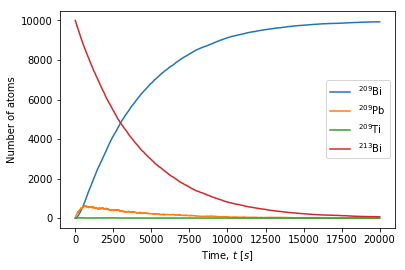

Runtime: 2.89 minutes


In [6]:
t0 = time.time()

random.random()

h = 1
Bi209 = 0
Pb209 = 0
Ti209 = 0
Bi213 = 10000

pPb = 1 - 2**(-h/3.3/60)
pTi = 1 - 2**(-h/2.2/60)
pBi = 1 - 2**(-h/46/60)

Bi209_list = []
Pb209_list = []
Ti209_list = []
Bi213_list = []

t = np.arange(0,2e4,h)
for ti in t:
    Bi209_list.append(Bi209)
    Pb209_list.append(Pb209)
    Ti209_list.append(Ti209)
    Bi213_list.append(Bi213)
    for i in range(Pb209):
        if random.random() < pPb:
            Pb209 -= 1
            Bi209 += 1
    for i in range(Ti209):
        if random.random() < pTi:
            Ti209 -= 1
            Pb209 += 1
    for i in range(Bi213):
        if random.random() < pBi:
            Bi213 -= 1
            if random.random() < 0.9791:
                Pb209 += 1
            else:
                Ti209 += 1

t1 = time.time()
                
mp.plot(t,Bi209_list, label="$^{209}$Bi")
mp.plot(t,Pb209_list, label="$^{209}$Pb")
mp.plot(t,Ti209_list, label="$^{209}$Ti")
mp.plot(t,Bi213_list, label="$^{213}$Bi")
mp.legend()
mp.xlabel("Time, $t$ [$s$]")
mp.ylabel("Number of atoms")
mp.show()

ttot = t1-t0
if ttot < 60:
    print("Runtime: %.2f seconds" %ttot)
else:
    print("Runtime: %.2f minutes" %(ttot/60))

<b>Exercise 10.4: Radioactive decay again</b>

Redo the calculation from Example 10.1, but this time using the faster method described in the preceding section. Using the transformation method, generate 1000 random numbers from the nonuniform distribution of Eq. (10.5) to represent the times of decay of 1000 atoms of $^{208}$Tl (which has half-life 3.053 minutes). Then make a plot showing the number of atoms that have not decayed as a function of time, i.e., a plot as a function of $t$ showing the number of atoms whose chosen decay times are greater than $t$.

Hint: You may find it useful to know that the package numpy contains a function <code>sort</code> that will rearrange the elements of an array in increasing order. That is, <code>b = sort(a)</code> returns a new array $b$ containing the same numbers as $a$, but rearranged in order from smallest to largest.

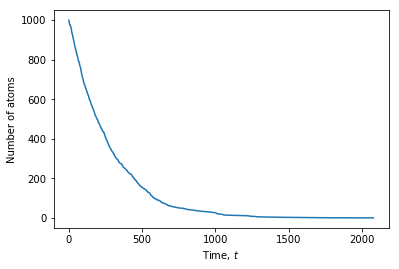

Runtime: 0.002 seconds


In [9]:
N = 1000
tau = 3.053*60
mu = np.log(2)/tau

t0 = time.time()

z = random.random(N)

t_dec = -1/mu*np.log(1-z)
t_dec = np.sort(t_dec)
decayed = np.arange(1,N+1)
survived = -decayed+N

t1 = time.time()

mp.plot(t_dec,survived)
mp.xlabel("Time, $t$")
mp.ylabel("Number of atoms")
mp.show()

ttot = t1-t0
if ttot < 60:
    print("Runtime: %.3f seconds" %ttot)
else:
    print("Runtime: %.2f minutes" %ttot/60)

<b>Exercise 10.5:</b>

a) Write a program to evaluate the integral in Eq. (10.22) using the “hit-or-miss” Monte Carlo method of Section 10.2 with 10,000 points. Also evaluate the error on your estimate.

b) Now estimate the integral again using the mean value method with 10,000 points. Also evaluate the error.

You should find that the error is somewhat smaller using the mean value method.

In [12]:
def f(x):
    return np.sin(1/x/(2-x))**2

a = 0
b = 2
A = (b-a)
N = 10000

x = random.random(N)*2
y = random.random(N)

fx = f(x)
count = sum(fx>y)
I1 = A*count/N
sigma1 = np.sqrt(I1*(A-I1)/N)
print("Monte Carlo: I1 = {0} +/- {1:5f}".format(I1,sigma1))

I2 = (b-a)/N*sum(fx)
var2 = sum(fx**2)/N - (sum(fx)/N)**2
sigma2 = (b-a)*np.sqrt(var2/N)
print("Mean value: I2 = {0} +/- {1:5f}".format(I2,sigma2))

Monte Carlo: I1 = 1.4518 +/- 0.008921
Mean value: I2 = 1.4484158855628746 +/- 0.005289


<b>Exercise 10.7: Volume of a hypersphere</b>

This exercise asks you to estimate the volume of a sphere of unit radius in ten dimensions using a Monte Carlo method. Consider the equivalent problem in two dimensions, the area of a circle of unit radius.

The area of the circle is given by the integral

\begin{equation}
    I = \int\int_{-1}^{+1} f(x,y) \textrm{ d}x\textrm{ d}y
\end{equation}

where $f(x,y)=1$ everywhere inside the circle and zero everywhere outside. 

So if we didn’t already know the area of the circle, we could calculate it by Monte Carlo integration. We would generate a set of $N$ random points $(x, y)$, where both $x$ and $y$ are in the range from −1 to 1. Then the two-dimensional version of Eq. (10.33) for this calculation would be

\begin{equation}
    I \approx \frac{4}{N}\sum_{i=1}^N f(x_i,y_i)
\end{equation}

Generalize this method to the ten-dimensional case and write a program to perform a Monte Carlo calculation of the volume of a sphere of unit radius in ten dimensions.

If we had to do a ten-dimensional integral the traditional way, it would take a very long time. Even with only 100 points along each axis (which wouldn’t give a very accurate result) we’d still have 100$^{10}$ = 10$^{20}$ points to sample, which is impossible on any computer. But using the Monte Carlo method we can get a pretty good result with a million points or so.

In [14]:
N = int(1e6)
dim = 10

def f(x):
    r2 = np.zeros(x.shape[1], float)
    for xi in x:
        r2 += xi**2
    return r2<1

t0 = time.time()

x = random.random((dim,N))*2 - 1

fx = f(x)
I = 2**dim/N*sum(fx)

var = sum(fx**2)/N-(sum(fx)/N)**2
sigma = 2**dim*np.sqrt(var/N)
print("I = {} + {}".format(I,sigma))

t1 = time.time()

ttot = t1-t0
if ttot < 60:
    print("Runtime: %.2f seconds" %ttot)
else:
    print("Runtime: %.2f minutes" %ttot/60)

I = 2.5774079999999997 + 0.05130909042266815
Runtime: 32.780 seconds


<b>Exercise 10.8:</b>

Calculate a value for the integral

\begin{equation}
    I = \int_0^1 \frac{x^{-\frac{1}{2}}}{e^x + 1}\textrm{ d}x
\end{equation}

using the importance sampling formula, Eq. (10.42), with $w(x) = x^{−\frac{1}{2}}$, as follows.

a) Show that the probability distribution $p(x)$ from which the sample points should be drawn is given by

\begin{equation}
    p(x) = \frac{1}{2\sqrt{x}}
\end{equation}

and derive a transformation formula for generating random numbers between zero and one from this distribution.

b) Using your formula, sample $N$ = 1,000,000 random points and hence evaluate the integral. You should get a value around 0.84.

In [16]:
N = int(1e6)
z = random.random(N)
x = z**2

def f(x):
    return 1/(1+np.exp(x))

I = sum(f(x))/N*2

print("I = {}".format(I))

I = 0.8388309999644743


<b>Exercise 10.9: The Ising model</b>

The Ising model is a theoretical model of a magnet. The magnetization of a magnetic material is made up of the combination of many small magnetic dipoles spread throughout the material. If these dipoles point in random directions then the overall magnetization of the system will be close to zero, but if they line up so that all or most of them point in the same direction then the system can acquire a macroscopic magnetic moment — it becomes magnetized. The Ising model is a model of this process in which the individual moments are represented by dipoles or “spins” arranged on a grid or lattice.


Write a program to perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 $\times$ 20 spins. You will need to set up variables to hold the value $\pm$1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

a) First write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $−J$.

Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $−J s_1 s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $−J s_2 s_1$.

Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python’s ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower.

b) Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to $\pm$1, so that on average about a half of them are up and a half down, giving a total magnetization of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spin. Now repeat this process for many moves.

c) Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a “spontaneous magnetization,” a nonzero value of the overall magnetization. 

Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results.

d) Run your programseveral times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explanation of what is happening.

e) Make a second version of your program that produces an animation of the system using the <code>visual</code> package, with spheres or squares of two colors, on a regular grid, to represent the up and down spins. Run it with temperature $T$ = 1 and observe the behavior of the system. Then run it two further times at temperatures $T$ = 2 and $T$ = 3. Explain briefly what you see in your three runs. How and why does the behavior of the system change as temperature is increased?

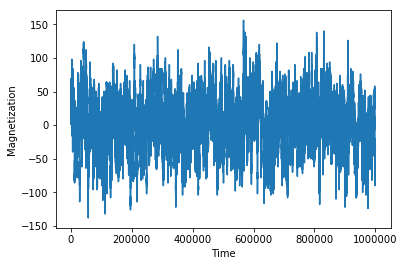

In [51]:
N = 20
J = 1
T = 1
kb = 1
beta = 1
steps = int(1e6)

s = np.empty((N,N), int)
for i in range(N):
    for j in range(N):
        if random.random() < 0.5:
            s[i,j] = 1
        else:
            s[i,j] = -1
    
def energy(s):
    s1 = s[:-1,:]*s[1:,:]
    s2 = s[:,:-1]*s[:,1:]
    E = -J*(np.sum(s1) + np.sum(s2))
    return E

def energycheck(s):
    I = 0
    for i in range(N-1):
        for j in range(N):
            I += s[i,j]*s[i+1,j]
    for i in range(N):
        for j in range(N-1):
            I += s[i,j]*s[i,j+1]
    return -J*I

eplot = []
Mplot = []
E1 = energy(s)
M = sum(s)
for k in range(steps):
    i = random.randint(N)
    j = random.randint(N)
    s[i,j] *= -1
    E2 = energy(s)
    dE = E2 - E1
    if dE > 0:
        if random.random() < np.exp(-beta*dE):
            E1 = E2
            M = np.sum(s)
        else:
            s[i,j] *= -1
            E1 = E2
    else:
        E1 = E2
        M = np.sum(s)
    eplot.append(E1)
    Mplot.append(M)

mp.plot(Mplot)
mp.xlabel("Time")
mp.ylabel("Magnetization")
mp.show()

<b>Exercise 10.10: Global minimum of a function</b>

Consider the function $f(x) = x^2 − \cos{4\pi x}$. Clearly the global minimum of this function is at $x$ = 0.

a) Write a program to confirm this fact using simulated annealing starting at, say, $x$ = 2, with Monte Carlo moves of the form $x \rightarrow x+\delta$ where $\delta$ is a random number drawn from a Gaussian distribution with mean zero and standard deviation one. (See Section 10.1.6 for a reminder of how to generate Gaussian random numbers.) Use an exponential cooling schedule and adjust the start and end temperatures, as well as the exponential constant, until you find values that give good answers in reasonable time. Have your program make a plot of the values of $x$ as a function of time during the run and have it print out the final value of $x$ at the end. You will find the plot easier to interpret if you make it using dots rather than lines, with a statement of the form <code>plot(x,".")</code> or similar.

b) Now adapt your program to find the minimum of the more complicated function $f(x) = \cos{x} + \cos{\sqrt{2}x} + \cos{\sqrt{3}x}$ in the range $0 < x < 50$.

Hint: The correct answer for part (b) is around $x$ = 16, but there are also competing minima around $x$ = 2 and $x$ = 42 that your program might find. In real-world situations, it is often good enough to find any reasonable solution to a problem, not necessarily the absolute best, so the fact that the program sometimes settles on these other solutions is not necessarily a bad thing.

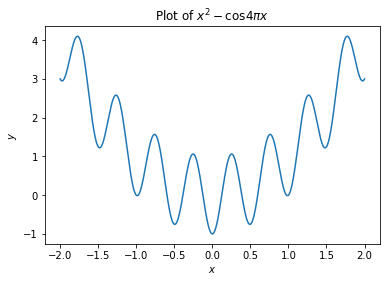

x = -0.0010488374774631835 with f(x) = -0.9999120439368888


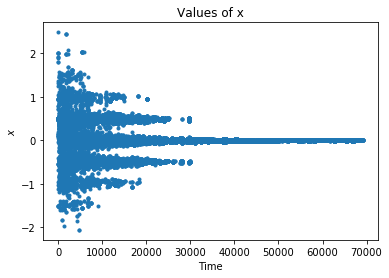

In [74]:
Tmax = 1
Tmin = 1e-3
tau = 1e4
x0 = 2

x = np.linspace(-2,2,1000)
mp.plot(x,x**2 - np.cos(4*np.pi*x))
mp.xlabel("$x$")
mp.ylabel("$y$")
mp.title("Plot of $x^2 - \cos{4\pi x}$")
mp.show()

def f(x):
    return x**2 - np.cos(4*np.pi*x)

def g(x):
    if x > 0 and x < 100:
        return (np.cos(x) + np.cos(np.sqrt(2)*x) + np.cos(np.sqrt(3)*x))
    else:
        return 1e10

fx = f(x0)
t = 0
T = Tmax
x = x0
xarr = []

while T > Tmin:
    t += 1
    T = Tmax*np.exp(-t/tau)
    dx = x
    dfx = fx
    r = random.standard_normal()
    x += r
    fx = f(x)
    delta_fx = fx - dfx
    if random.random() > np.exp(-delta_fx/T):
        x = dx
        fx = dfx
    xarr.append(x)

print("x = {} with f(x) = {}".format(x,fx))

mp.plot(xarr, ".")
mp.xlabel("Time")
mp.ylabel("$x$")
mp.title("Values of x")
mp.show()

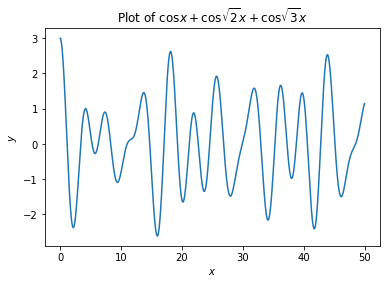

x = 15.955074443711158 with g(x) = -2.612538639849541


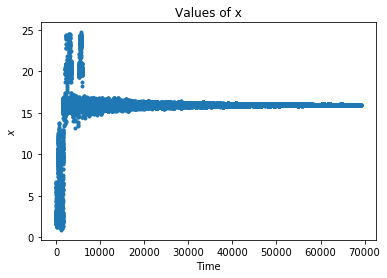

In [75]:
x = np.linspace(0,50,1000)
mp.plot(x,np.cos(x) + np.cos(np.sqrt(2)*x) + np.cos(np.sqrt(3)*x))
mp.xlabel("$x$")
mp.ylabel("$y$")
mp.title("Plot of $\cos{x}+\cos{\sqrt{2}x}+\cos{\sqrt{3}x}$")
mp.show()

gx = g(x0)
t = 0
T = Tmax
x = x0
garr = []

while T > Tmin:
    t += 1
    T = Tmax*np.exp(-t/tau)
    dx = x
    dgx = gx
    r = random.standard_normal()
    x += r
    gx = g(x)
    delta_gx = gx - dgx
    if random.random() > np.exp(-delta_gx/T):
        x = dx
        gx = dgx
    garr.append(x)

print("x = {} with g(x) = {}".format(x,gx))

mp.plot(garr, ".")
mp.xlabel("Time")
mp.ylabel("$x$")
mp.title("Values of x")
mp.show()